### 导入相关程序库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 获取KPI名称和KPI ID对应关系

In [2]:
kpi_id_path = r'D:\userdata\anliu\Desktop'
kpi_id_name = r'kpi_id_17a.csv'
kpi_id_file = os.path.join(kpi_id_path, kpi_id_name)

try:
    os.chdir(kpi_id_path)
except:
    print("The folder does not existed!")
    
kpi_def = pd.read_csv(kpi_id_file)
kpi_def.dropna(axis=1, how='all', inplace=True)

def query_kpi_id(kpi_id):   
    mask = kpi_def.loc[kpi_def.loc[:, 'KPI ID'] == kpi_id]
    
    kpi_name = mask['Name'].values[0]
    kpi_formula = mask['Formula'].values[0]
    kpi_level = mask['Level'].values[0]
    
    return kpi_id, kpi_name, kpi_formula, kpi_level

### 分析KPI数据

In [3]:
# kpi log所在文件路径
kpi_data_path = r'D:\userdata\anliu\Desktop'
kpi_data_name = r'test1.csv'
kpi_data_file = os.path.join(kpi_data_path, kpi_data_name)

# 切换到kpi log所在路径
try:
    os.chdir(kpi_data_path)
except:
    print("The folder does not existed!")

#### 读取eNB软件版本

In [4]:
# 读取csv文件，返回有效数据起始行数
def fetch_sw_version(file):
    nrow = 0
    with open(file,"r") as f:
        sw_version = f.readline()
        sw_version = sw_version.strip()
        sw_version = sw_version.split(',')[0]
    
    return sw_version

In [5]:
print(fetch_sw_version(kpi_data_file))

TL17A_ENB_0000_040029_000000


#### 读取KPI数据

In [6]:
# 从CSV文件中读取数据并存储为dataframe
def read_kpi_data(file):
    data = pd.read_csv(file, low_memory=True, skiprows=3, error_bad_lines=False, warn_bad_lines=False)
    return data

# 整理数据
# 如果某些列不全部都是NA值，使用中位数填充NA值
from sklearn.preprocessing import Imputer
def fill_na_data(data):
    # print(np.where(data.isnull()))
    imputer = Imputer(strategy='median')
    imputer.fit(data)
    X = imputer.transform(data)
    data = pd.DataFrame(X, columns=data.columns)
    # np.where(data.isnull())
    
    return data

def clean_up_data(data):  
    # 替换第一列名称为Time
    names = data.columns.tolist()
    names[names.index('Period start time')] = 'Time'
    data.columns = names
    data['Time'] = pd.to_datetime(data['Time'])  
    data.set_index('Time', inplace=True)
    
    # 删除值全部为NA的列
    data.dropna(axis=1, how='all', inplace=True)
    
    # 如果某些列不全部都是NA值，使用中位数填充NA值
    data = fill_na_data(data)

    return data

#### 整理数据，获取数据基本信息

In [7]:
# 读取整理数据
kpi_data = read_kpi_data(kpi_data_file)
kpi_data = clean_up_data(kpi_data)
print(kpi_data.info())
print(kpi_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 632 entries, LTE_5003a to M8011C62
dtypes: float64(632)
memory usage: 276.6 KB
None
        LTE_5003a  LTE_5004d   LTE_5009b   LTE_5017a  LTE_5029a  LTE_5031b  \
count   56.000000  56.000000   56.000000   56.000000       56.0       56.0   
mean    99.971107   2.184589   99.997464   99.995643        0.0        0.0   
std      0.036204   2.973027    0.050048    0.037787        0.0        0.0   
min     99.879000   0.252000   99.857000   99.882000        0.0        0.0   
25%     99.952750   0.400000  100.000000   99.979500        0.0        0.0   
50%     99.980500   0.611000  100.000000  100.000000        0.0        0.0   
75%    100.000000   2.740000  100.000000  100.000000        0.0        0.0   
max    100.042000  12.853000  100.129000  100.079000        0.0        0.0   

        LTE_5032a  LTE_5088c   LTE_5112c   LTE_5113d    ...      LTE_760f  \
count   56.000000       56.0   56.000000   56.000000    .

#### 打印出KPI ID对应的KPI名字

In [8]:
def read_kpi_name(columns):
    for kpi_id in columns:
        try:
            kpi = query_kpi_id(kpi_id)
            print(kpi_id + ": " + kpi[1])
        except:
            print(kpi_id + ': does not existed!')

read_kpi_name(kpi_data.columns)

LTE_5003a: E-UTRAN Data Radio Bearer Setup Success Ratio
LTE_5004d: E-UTRAN Radio Bearer Drop Ratio
LTE_5009b: E-UTRAN Initial Context Setup Success Ratio
LTE_5017a: E-UTRAN E-RAB Setup Success Ratio
LTE_5029a: E-RAB ENB-EPC Release Ratio
LTE_5031b: E-UTRAN RRC Paging Discard Ratio
LTE_5032a: # RRC paging messages
LTE_5088c: E-UTRAN E-RAB Setup Failure Ratio per Cause resource failure (RESOUR)
LTE_5112c: E-UTRAN Initial E-RAB Setup Success Ratio
LTE_5113d: E-UTRAN Additional E-RAB Setup Success Ratio
LTE_5116a: E-UTRAN Data Radio Bearer Attempts
LTE_5118a: E-UTRAN E-RAB Setup Attempt
LTE_5120b: E-UTRAN Initial Context Setup Attempts
LTE_5122b: E-UTRAN RRC Paging Records
LTE_5141a: RRC Connection Re-establishment Attempts, HO fail
LTE_5142a: RRC Connection Re-establishment Attempts, other fails
LTE_5143a: Total E-UTRAN RRC Connection Re-establishment Success Ratio
LTE_5144a: Total E-UTRAN RRC Connection Re-establishment rejection Ratio
LTE_5167a: E-UTRAN Total PDCCH Order Attempts
LTE_5

LTE_5316a: E-UTRAN Number of Load Balancing HO Atempts
LTE_5530a: E-UTRAN Service Based HO Attempts
LTE_5531a: E-UTRAN HO Preparation due to RLF Success Ratio
LTE_5532a: E-UTRAN HO Preparation due to RLF Attempts
LTE_5533a: E-UTRAN Total HO due to RLF Success ratio
LTE_5534a: E-UTRAN UE Context Retrievals due to RLF Success ratio
LTE_5535a: E-UTRAN UE Context Retrievals due to RLF Attempts
LTE_5536a: E-UTRAN UE Context Retrievals due to RLF Failure Ratio
LTE_5562a: E-UTRAN Inter RAT HO Attempts to UTRAN SRVCC
LTE_5565a: E-UTRAN Inter RAT HO Attempts to GERAN SRVCC
LTE_5658a: E-UTRAN Number of Incoming HO Preparation Attempts
LTE_5659a: E-UTRAN Incoming HO Preparation Success Ratio
LTE_5660a: E-UTRAN Incoming HO Preparation Failure Ratio due to Missing Radio Resources
LTE_5661a: E-UTRAN Incoming HO Preparation Failure Ratio due to Missing Transport Resources
LTE_5711a: E-UTRAN Inter-Frequency QCI1 HO Attempts for A3/A5 measurement-based handovers
LTE_5713a: Inter RAT HO preparation atte

LTE_5501b: E-UTRAN Average Active UEs with Scheduled Data in DL
LTE_5502b: E-UTRAN Average Active UEs with Scheduled Data in UL
LTE_5509a: E-UTRAN Averaged IP Throughput in DL, QCI7
LTE_5516a: E-UTRAN Averaged IP Throughput in UL, QCI5
LTE_5518a: E-UTRAN Averaged IP Throughput in UL, QCI7
LTE_5559c: E-UTRAN Average Active UEs with data in the buffer for DRBs of QCI2 DL
LTE_5560c: E-UTRAN Average Active UEs with data in the buffer for DRBs of QCI3 DL
LTE_5561c: E-UTRAN Average Active UEs with data in the buffer for DRBs of QCI4 DL
LTE_5610a: E-UTRAN Maximum Number of Simultaneous QCI1 E-RABs
LTE_5611a: E-UTRAN Maximum Number of Simultaneous QCI2 E-RABs
LTE_5612a: E-UTRAN Maximum Number of Simultaneous QCI3 E-RABs
LTE_5613a: E-UTRAN Maximum Number of Simultaneous QCI4 E-RABs
LTE_5614a: E-UTRAN Maximum Number of Simultaneous QCI5 E-RABs
LTE_5615a: E-UTRAN Maximum Number of Simultaneous QCI6 E-RABs
LTE_5616a: E-UTRAN Maximum Number of Simultaneous QCI7 E-RABs
LTE_5617a: E-UTRAN Maximum Num

LTE_5979a: E-UTRAN Active UEs with UE Category 5 Distribution Ratio
LTE_5980a: E-UTRAN Active UEs with UE Category 6 Distribution Ratio
LTE_5981a: E-UTRAN Active UEs with UE Category 7 Distribution Ratio
LTE_5982a: E-UTRAN Active UEs with UE Category 8 Distribution Ratio
LTE_5983a: E-UTRAN Active UEs with UE Category 9 Distribution Ratio
LTE_5984a: E-UTRAN Active UEs with UE Category 10 Distribution Ratio
LTE_5985a: E-UTRAN Active UEs with UE Category 11 Distribution Ratio
LTE_5986a: E-UTRAN Active UEs with UE Category 12 Distribution Ratio
LTE_5987a: E-UTRAN Active UEs with DL UE Category 6 Distribution Ratio
LTE_5988a: E-UTRAN Active UEs with DL UE Category 7 Distribution Ratio
LTE_5989a: E-UTRAN Active UEs with DL UE Category 9 Distribution Ratio
LTE_5990a: E-UTRAN Active UEs with DL UE Category 10 Distribution Ratio
LTE_5991a: E-UTRAN Active UEs with DL UE Category 11 Distribution Ratio
LTE_5992a: E-UTRAN Active UEs with DL UE Category 12 Distribution Ratio
LTE_5993a: E-UTRAN Activ

#### 分析KPI数据

In [9]:
# 定义KPI组合
cell_load = ['LTE_6245a', 'LTE_6265a', 'LTE_5214b', 'LTE_5804c', 'LTE_5242b', 'LTE_5394a', 'LTE_6001a', 'LTE_6002a',
             'LTE_5319c', 'LTE_5320b', 'LTE_5672b', 'LTE_5674b', 'LTE_5837b', 'LTE_5838b', 'LTE_5999a', 'LTE_753c', 
             'LTE_5320b', 'LTE_5656b', ]
cell_meas = ['LTE_5368a', 'LTE_5369a', 'LTE_5370a', 'LTE_5371a', 'LTE_5427c', 'LTE_5432b', 'LTE_1552b', 'LTE_1553a',
             'LTE_5273b', 'LTE_5276b', 'LTE_5657a']
cplane = ['LTE_5017a', 'LTE_5218g', 'LTE_5204c', 'LTE_5693a', 'LTE_5025h', 'LTE_5572f',
          'LTE_5035a', 'LTE_5568a', 'LTE_5114a', 'LTE_5048b', 'LTE_5873a', 'LTE_5886a', 'LTE_5082a', 'LTE_5884a', 
          'LTE_5880a', 'LTE_5882a', 'LTE_5567a']
uplane = ['LTE_5292d', 'LTE_5289d', 'LTE_5276b', 'LTE_5273b', 'LTE_1074a', 'LTE_1075a']

# 根据counter提取数据
def kpi_filter_counter(data, comb_list):
    read_kpi_name(comb_list)
    data = data.loc[:, comb_list]
    
    return data

# 根据时间提取数据
def kpi_filter_time(data, start, end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    data = data.loc[start:end, :]
    
    return data

# 归一化数据
from sklearn.preprocessing import StandardScaler
def data_norm(data):
    sc_X = StandardScaler()
    X = sc_X.fit_transform(data)
    data = pd.DataFrame(X, columns=data.columns)
    
    return data

##### 计算相关系数矩阵

In [10]:
def calc_corr(dataframe):
    corr = dataframe.corr()
    corr.dropna(axis=(0,1), how='all', inplace=True)
    sns.heatmap(corr, linewidths = 0.05);
    
    return corr
# np.fill_diagonal(corr.values, np.nan)
# mask = corr>0.6
# corr = corr[mask]
# fig = plt.figure(figsize=(12,8))
# sns.heatmap(corr, linewidths = 0.05);
# corr.dropna(axis=(0,1), how='all', inplace=True)
# print(corr)

##### 异常值检测

In [11]:
# 均值方差检测
def outlier_detect_std(sample, data):
    upper = np.mean(sample) + 3*np.std(sample)
    lower = np.mean(sample) - 3*np.std(sample)
    
    if (data>upper) or (data<lower):
        return False
    else:
        return True

def kpi_outlier_std(data):
    print('Mean-Std prediction:')   
    n = 0
    outlier = {}
    for i in data.columns:
        f = True
        for j, elem in enumerate(data[i]):
            flag = outlier_detect_std(data[i], elem)       
            if flag == False:
                if f:
                    f = False
#                     print(i + ':' + '-'*40)
                outlier[j] = outlier.get(j, 0) + 1
#                 print("{0}th: {1} out of range!".format(str(j), str(elem)))

    outlier_list = sorted(outlier.items(), key=lambda e:e[1], reverse=True)             
    print([x[0] for x in outlier_list])
                
# LOF异常值检测
from sklearn.neighbors import LocalOutlierFactor
def kpi_outlier_lof(data):
    print('LOF prediction:')
    clf = LocalOutlierFactor(n_neighbors=50, contamination=0.1)
    y_pred = clf.fit_predict(data)    
    
    print([i for i, e in enumerate(y_pred) if e==-1])
    

# Isolation forest异常值检测
from sklearn.ensemble import IsolationForest
def kpi_outlier_isoforest(data):
    print('Iosforest prediction:')
    clf = IsolationForest(n_estimators=100, n_jobs=-1, contamination=0.1)
    clf.fit(data)

    shape = data.shape[0]
    batch = 10**4

    y_pred = []
    for i in range(int(shape/batch)+1):
        start = i * batch
        end = (i+1) * batch
        test = data[:][start:end]
    
        pred = clf.predict(test)
        y_pred.extend(pred)

        print([i for i, e in enumerate(y_pred) if e==-1])

D:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
# start = '2018/6/15  21:00'
# end = '2018-06-16 10:0:0'
# kpi_data_time = kpi_filter_time(kpi_data, start, end)

# print(kpi_data.head())

kpi_data = data_norm(kpi_data)

kpi_outlier_std(kpi_data)

kpi_outlier_lof(kpi_data)

kpi_outlier_isoforest(kpi_data)

Mean-Std prediction:
[43, 11, 13, 10, 2, 35, 21, 48, 37, 47, 39, 52, 0, 1, 36, 30, 4, 12, 17, 46, 45, 33, 29, 32, 9, 50, 54, 25, 22, 16, 6, 38, 18, 26, 34, 7, 53, 55, 14, 42]
LOF prediction:
[11, 13, 39, 43, 47, 52]
Iosforest prediction:
[3, 11, 37, 39, 43, 47]


##### 根据小区traffic特征进行分类

LTE_6245a: E-UTRAN Maximum Number of Active UEs per cell
LTE_6265a: E-UTRAN Maximum Number of RRC Connected UEs per cell
LTE_5214b: E-UTRAN Maximum of Average Active Connected UEs
LTE_5804c: E-UTRAN Average Active Connected UEs
LTE_5242b: E-UTRAN Average RRC Connected UEs
LTE_5394a: E-UTRAN Average Number of Simultaneous QCI1 E-RABs
LTE_6001a: E-UTRAN Average Number QCI1 UEs in Good Conditions in Downlink
LTE_6002a: E-UTRAN Average Number QCI1 UEs in Bad Conditions in Downlink
LTE_5319c: E-UTRAN Average UEs with Configured one SCell in DL
LTE_5320b: E-UTRAN Average UEs with an Activated SCell in DL
LTE_5672b: E-UTRAN Average UEs with Configured two SCells in DL
LTE_5674b: E-UTRAN Average UEs with Activated Two SCells in DL
LTE_5837b: E-UTRAN Average UEs with an Activated SCell in UL
LTE_5838b: E-UTRAN Average UEs with Configured one SCell in UL
LTE_5999a: E-UTRAN Average UEs with Configured three SCells in DL
LTE_753c: RRC Setup Attempts
LTE_5320b: E-UTRAN Average UEs with an Activated

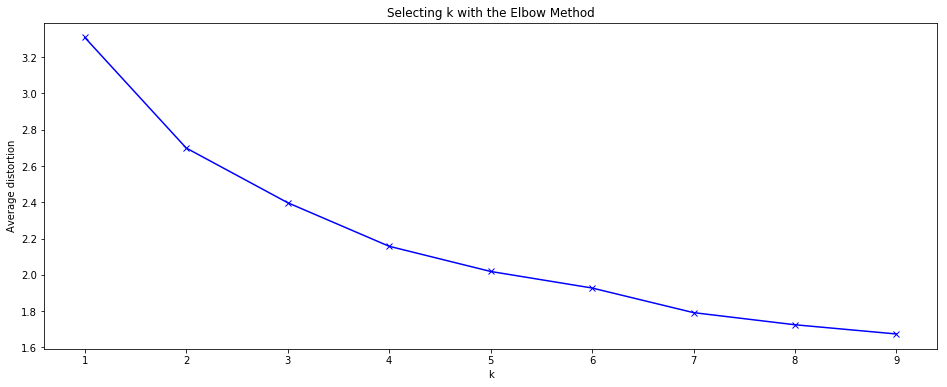

In [14]:
cell_load_data = kpi_filter_counter(kpi_data, cell_load)

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cell_load_data)
    # cdist函数用于计算两个输入集合的距离，通过metric参数指定计算距离的不同方式得到不同的距离度量值   
    meandistortions.append(sum(np.min(cdist(cell_load_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / cell_load_data.shape[0])

fig = plt.figure(1,(16,6))
ax = fig.add_subplot(1,1,1)

ax.plot(K, meandistortions, 'bx-')
ax.set_xlabel('k')
ax.set_ylabel('Average distortion')
ax.set_title('Selecting k with the Elbow Method')
plt.show()